 IMPORT LIBRARIES AND DATASETS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
credit_df=pd.read_csv('4.+Marketing_data.csv')

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [3]:
credit_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
credit_df.describe()
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
#getting information about this man who had a one off purchase of 40761
credit_df[credit_df['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
#getting in information of the person who had cash advance of 47137.211760
maximum=credit_df['CASH_ADVANCE'].max()
credit_df[credit_df['CASH_ADVANCE']==maximum]
#123 cash advance transaction 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


VISUALIZE AND EXPLORE DATASET





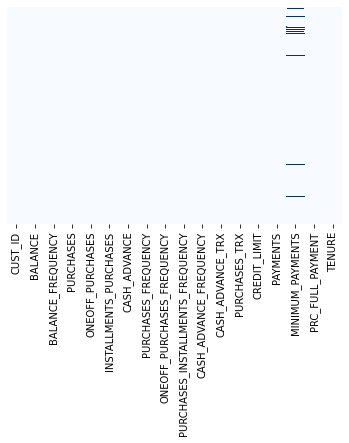

In [8]:
#missing data
sns.heatmap(credit_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [9]:
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
credit_df.loc[(credit_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = credit_df['MINIMUM_PAYMENTS'].mean()

In [11]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
credit_df.loc[(credit_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = credit_df['CREDIT_LIMIT'].mean()

In [12]:
credit_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
#customer id column dropped
credit_df.duplicated().sum()

0

In [14]:
credit_df.drop('CUST_ID',axis=1,inplace=True)

In [15]:
len(credit_df.columns)

17

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

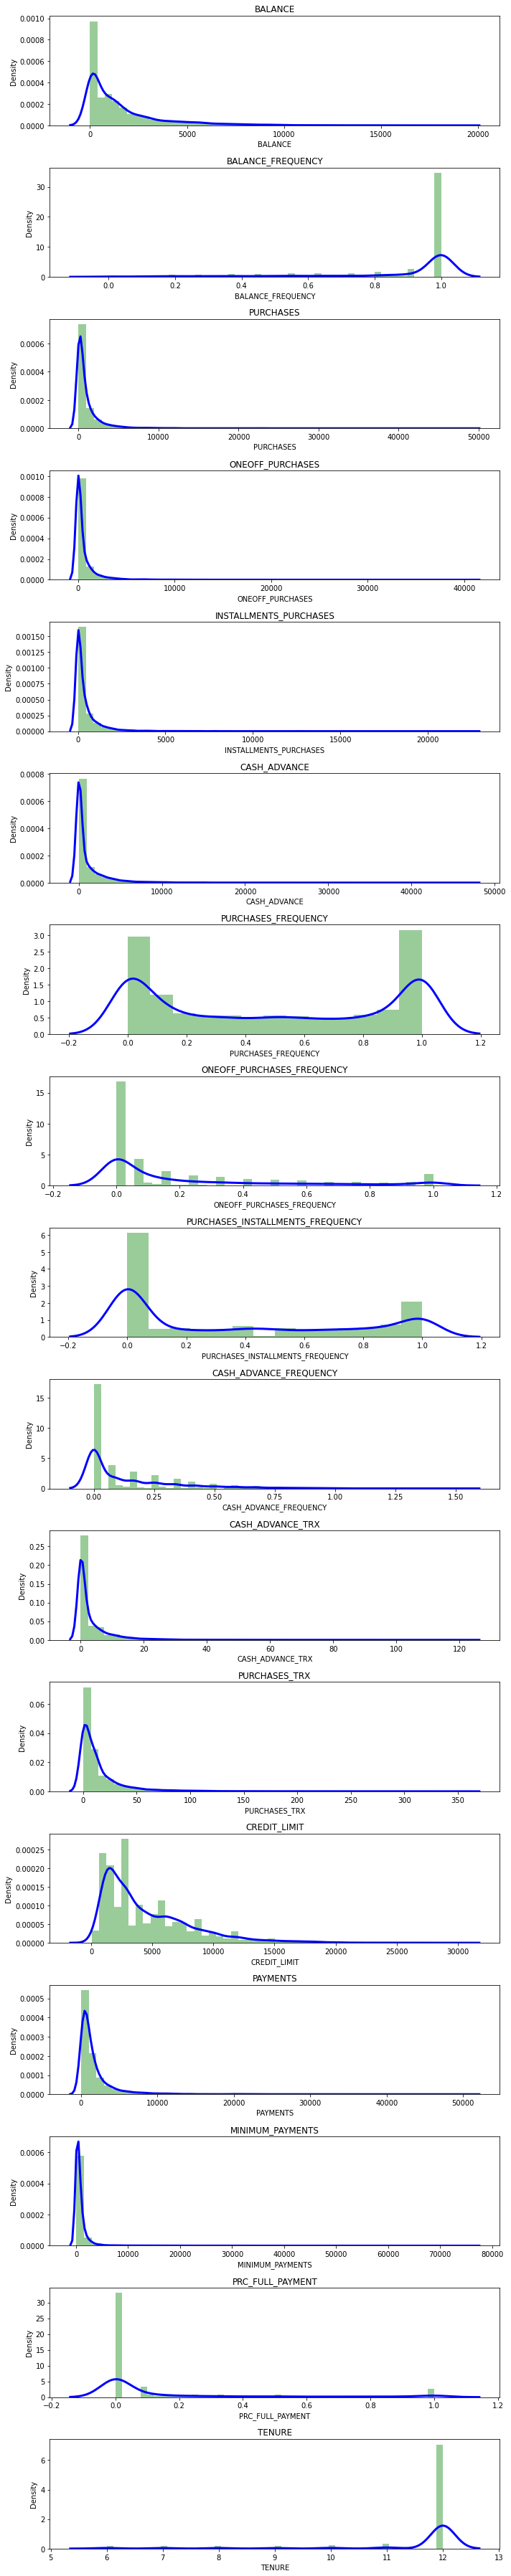

In [16]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(credit_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(credit_df[credit_df.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'g'})
  plt.title(credit_df.columns[i])
plt.tight_layout()  

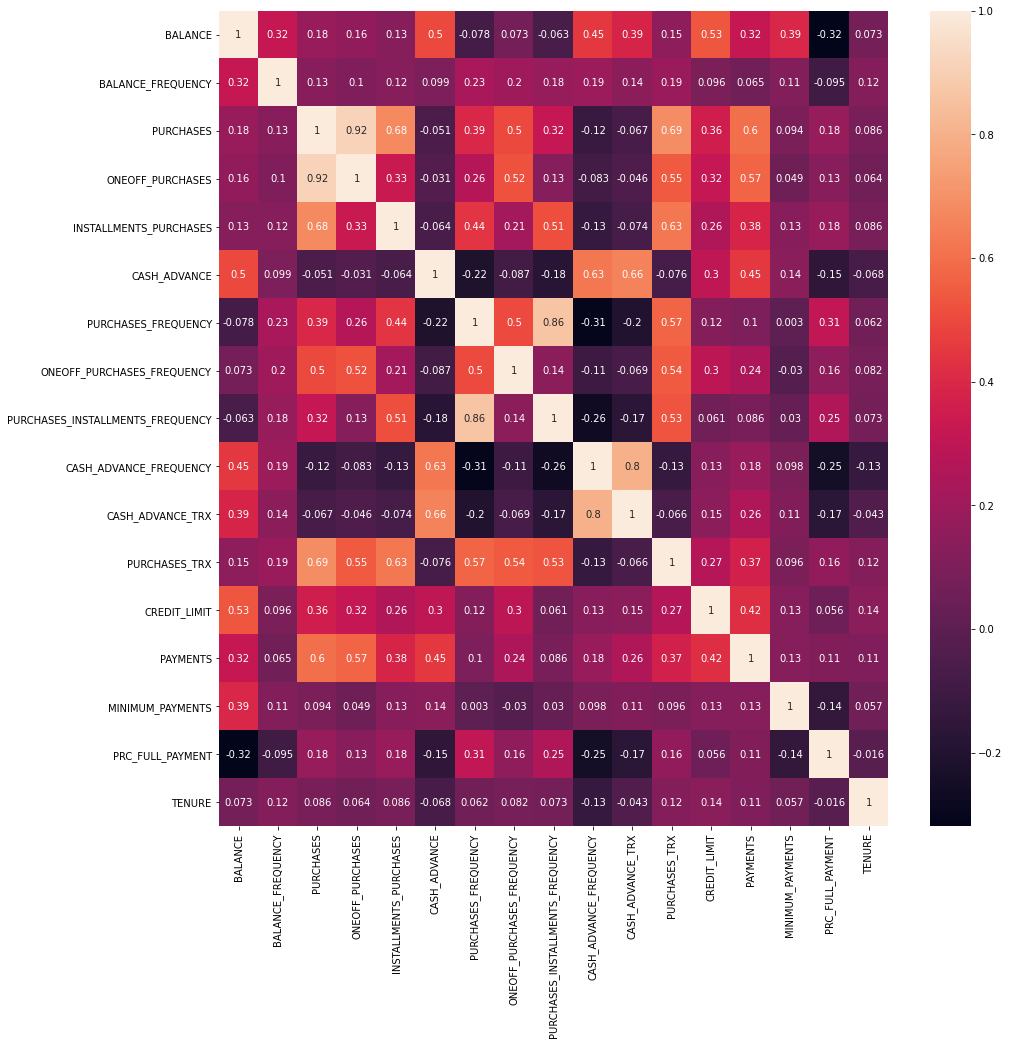

In [17]:
plt.figure(figsize=(15,15))
correlations=credit_df.corr()
sns.heatmap(correlations,annot=True)


KMeans Clustering

In [18]:
#within cluster sum of squares

In [19]:
scaler=StandardScaler()
credit_df_scaled=scaler.fit_transform(credit_df)

In [20]:
credit_df_scaled.shape

(8950, 17)

In [21]:
credit_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [22]:
score_1=[]

range_values=range(1,20)
for i in range_values:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(credit_df_scaled)
  score_1.append(kmeans.inertia_)


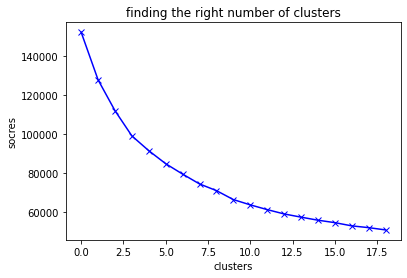

In [23]:
plt.plot(score_1,'bx-')
plt.title('finding the right number of clusters')
plt.xlabel('clusters')
plt.ylabel('socres')
plt.show()

In [24]:
#im picking 8 number of clusters

In [25]:
kmeans = KMeans(8)
kmeans.fit(credit_df_scaled)
labels = kmeans.labels_

In [26]:
labels

array([1, 2, 5, ..., 6, 6, 6], dtype=int32)

In [27]:
kmeans.cluster_centers_

array([[ 9.79527870e-01,  4.67519020e-01,  2.27079155e+00,
         1.70887469e+00,  2.22980812e+00, -1.86119991e-01,
         1.16101018e+00,  1.53120238e+00,  1.26578787e+00,
        -3.00358234e-01, -2.00451392e-01,  2.83375570e+00,
         1.23556773e+00,  1.29281002e+00,  6.49751062e-01,
         2.34752134e-01,  3.38429186e-01],
       [ 1.49025446e-02,  4.04414801e-01, -3.58131016e-01,
        -2.43442079e-01, -3.99439021e-01, -9.66976215e-02,
        -8.56156048e-01, -4.02212328e-01, -7.52280996e-01,
         9.97477231e-02, -3.24451820e-02, -4.82821365e-01,
        -3.04358832e-01, -2.52692629e-01, -6.05234371e-03,
        -4.57349548e-01,  2.73009800e-01],
       [ 1.66711771e+00,  3.89949566e-01, -2.18921451e-01,
        -1.56243875e-01, -2.30657526e-01,  2.00607341e+00,
        -4.78694444e-01, -2.06405358e-01, -4.18381830e-01,
         1.92020103e+00,  1.93352079e+00, -2.65414198e-01,
         1.01617237e+00,  8.18074857e-01,  5.07210196e-01,
        -3.91136772e-01,  7.2

In [28]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [credit_df.columns])
cluster_centers      

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.979528,0.467519,2.270792,1.708875,2.229808,-0.186120,1.161010,1.531202,1.265788,-0.300358,-0.200451,2.833756,1.235568,1.292810,0.649751,0.234752,0.338429
1,0.014903,0.404415,-0.358131,-0.243442,-0.399439,-0.096698,-0.856156,-0.402212,-0.752281,0.099748,-0.032445,-0.482821,-0.304359,-0.252693,-0.006052,-0.457350,0.273010
2,1.667118,0.389950,-0.218921,-0.156244,-0.230658,2.006073,-0.478694,-0.206405,-0.418382,1.920201,1.933521,-0.265414,1.016172,0.818075,0.507210,-0.391137,0.072494
3,-0.363325,0.333385,-0.034936,-0.240365,0.358800,-0.362358,0.995635,-0.376686,1.208502,-0.470457,-0.357446,0.193493,-0.256794,-0.213877,-0.054458,0.312898,0.256155
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
5,-0.175310,0.391735,0.497252,0.641160,-0.002331,-0.340031,0.957984,1.909508,0.099299,-0.425421,-0.339663,0.550959,0.395980,0.113876,-0.168017,0.457737,0.262884
6,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
7,-0.701368,-2.145072,-0.312447,-0.237526,-0.302285,-0.321782,-0.556727,-0.445738,-0.439325,-0.520713,-0.376018,-0.419883,-0.177196,-0.203414,-0.256627,0.280785,0.199062


In [29]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [credit_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3603.279406,0.988022,5854.785980,3428.819355,2427.455459,588.568798,0.956320,0.659245,0.867494,0.075039,1.880893,85.146402,8989.950372,5475.702196,2378.423983,0.222376,11.970223
1,1595.493216,0.973073,238.052398,188.373381,49.859894,776.091683,0.146734,0.082470,0.065462,0.155105,3.027412,2.708699,3387.067495,1001.623450,850.101811,0.019948,11.882675
2,5034.439627,0.969646,535.475779,333.104539,202.486906,5185.700763,0.298227,0.140883,0.198162,0.519396,16.443686,8.112628,8191.700279,4101.390405,2046.238509,0.039314,11.614334
3,808.243513,0.956247,928.562887,193.479881,735.526101,218.988661,0.889947,0.090085,0.844727,0.041001,0.809524,19.519345,3560.129068,1113.990827,737.293498,0.245232,11.860119
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,1199.581617,0.970069,2065.592120,1656.632258,408.959862,265.810881,0.874836,0.772101,0.403901,0.050013,0.930876,28.404608,5935.186426,2062.803305,472.650694,0.287595,11.869124
6,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
7,104.637027,0.369123,335.656938,198.193215,137.715462,304.079507,0.266909,0.069485,0.189838,0.030944,0.682782,4.273113,3849.736594,1144.281146,266.148080,0.235839,11.783715


In [30]:
labels.shape

(8950,)

In [31]:
labels.max()

7

In [32]:
labels.min()

0

In [33]:
credit_df_cluster=pd.concat([credit_df,pd.DataFrame({'cluster':labels})],axis=1)
credit_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


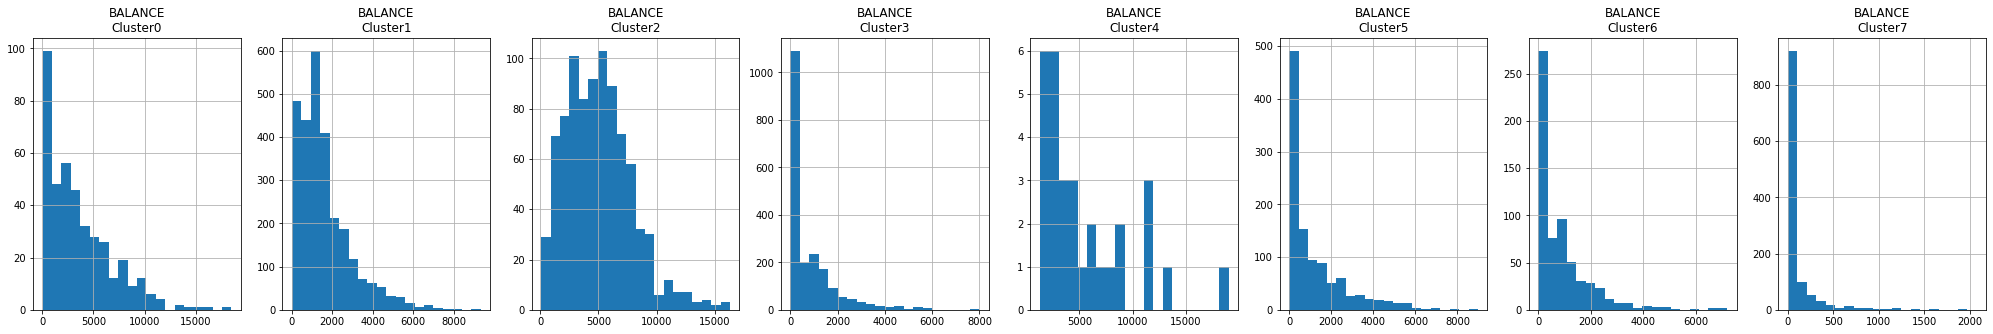

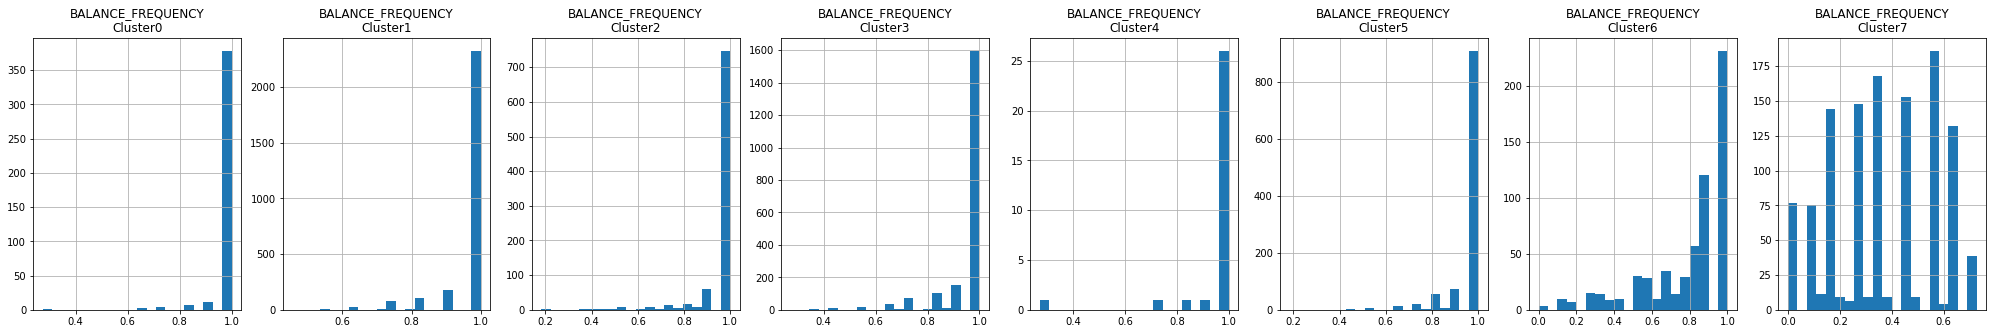

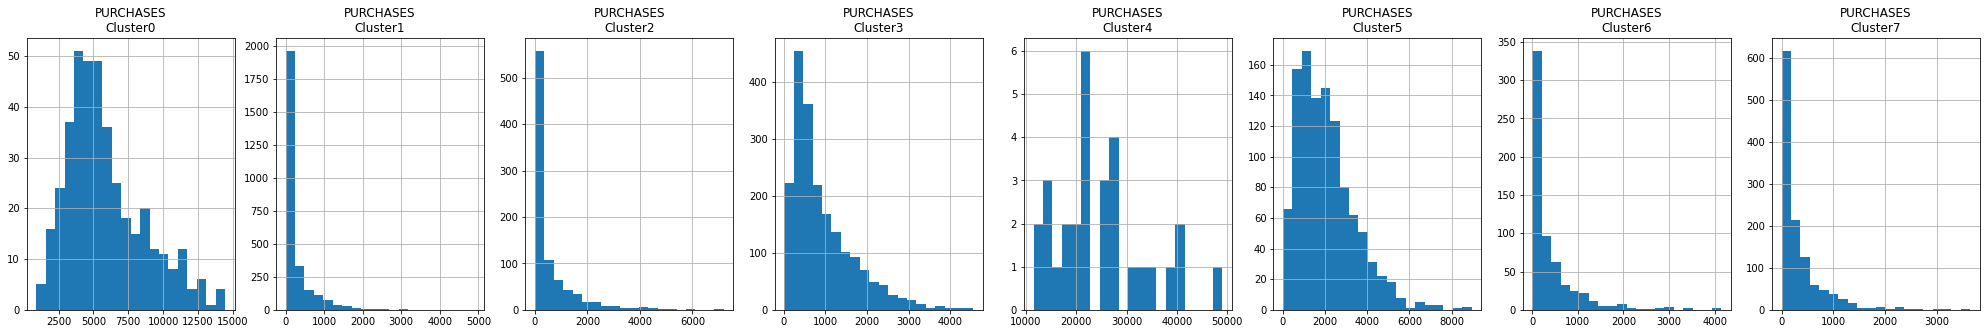

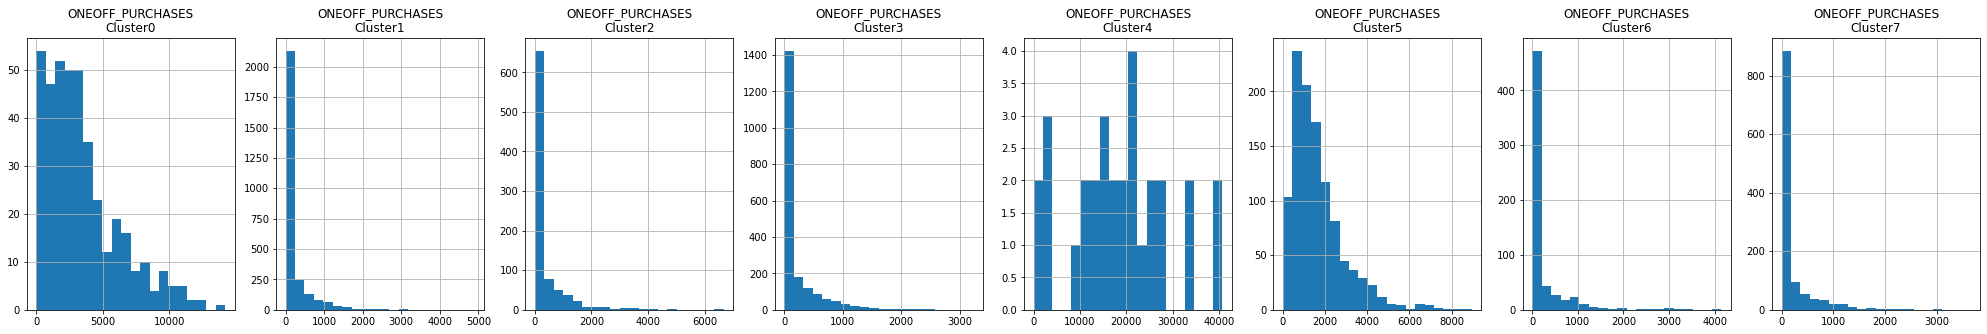

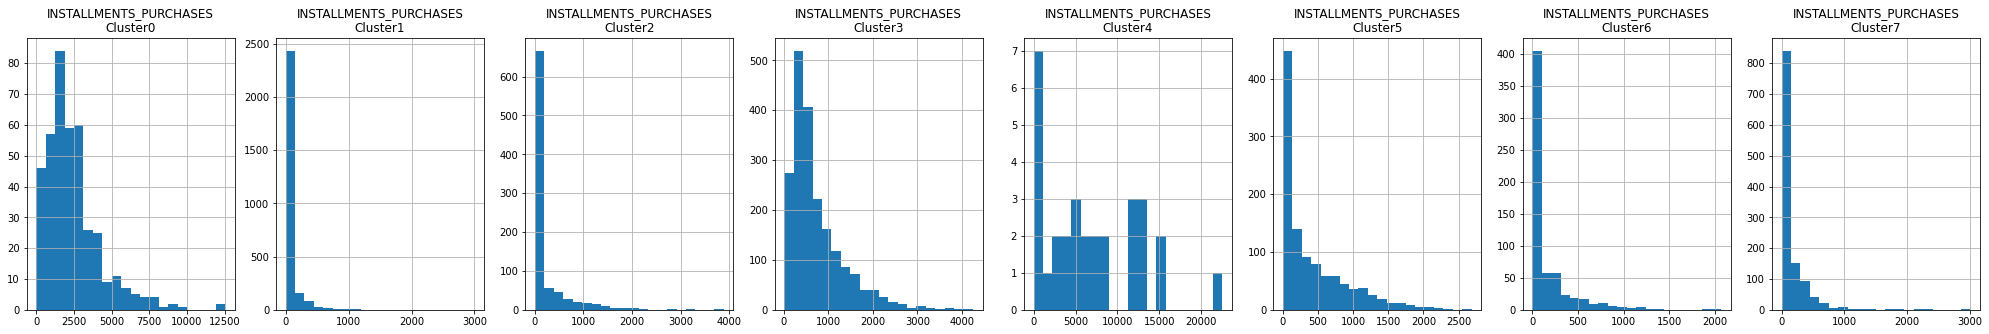

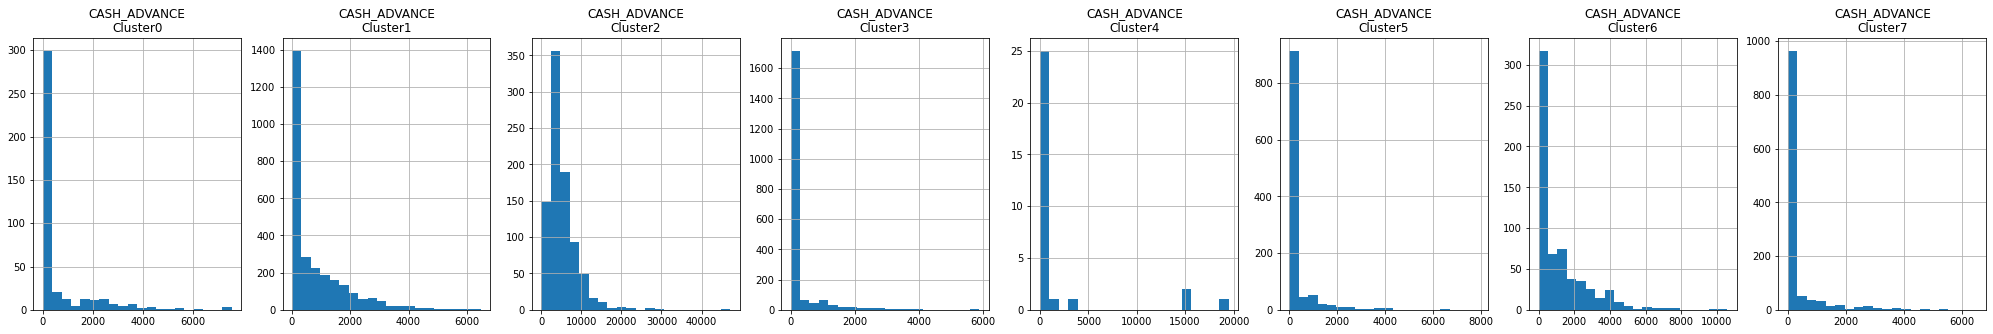

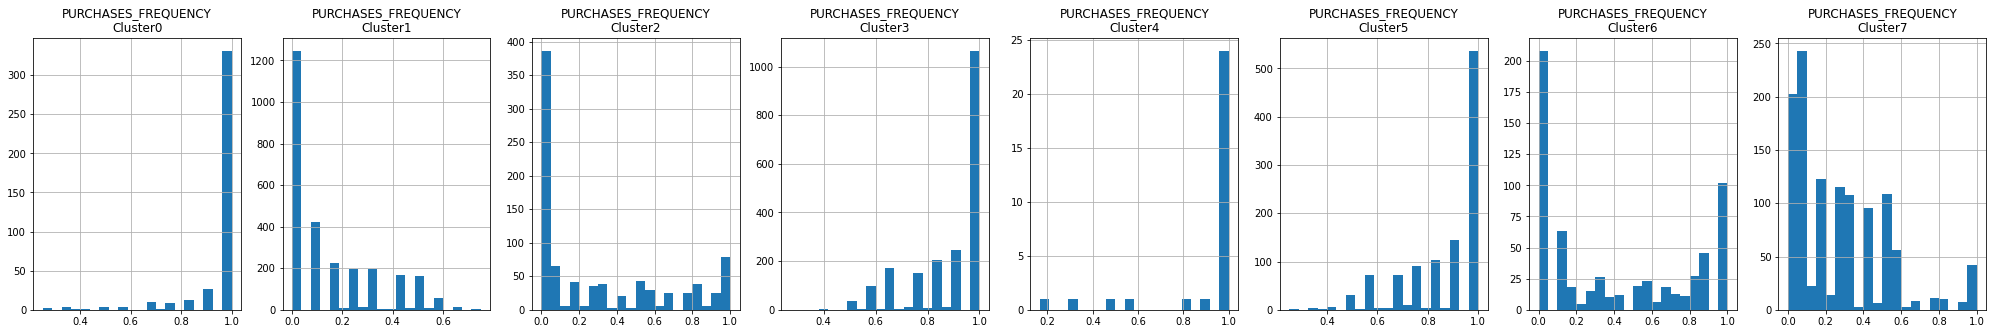

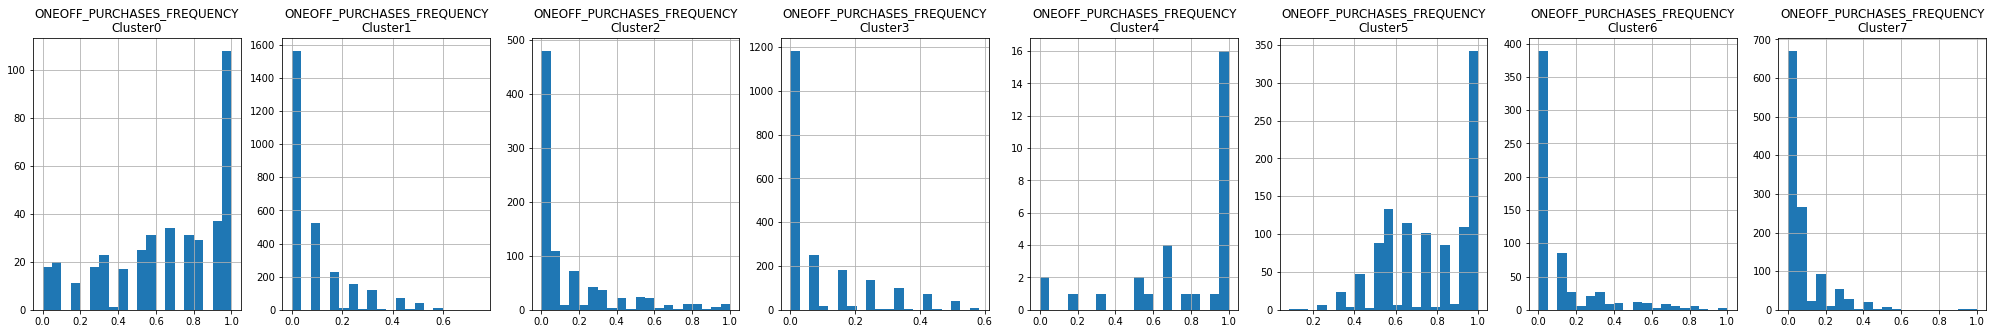

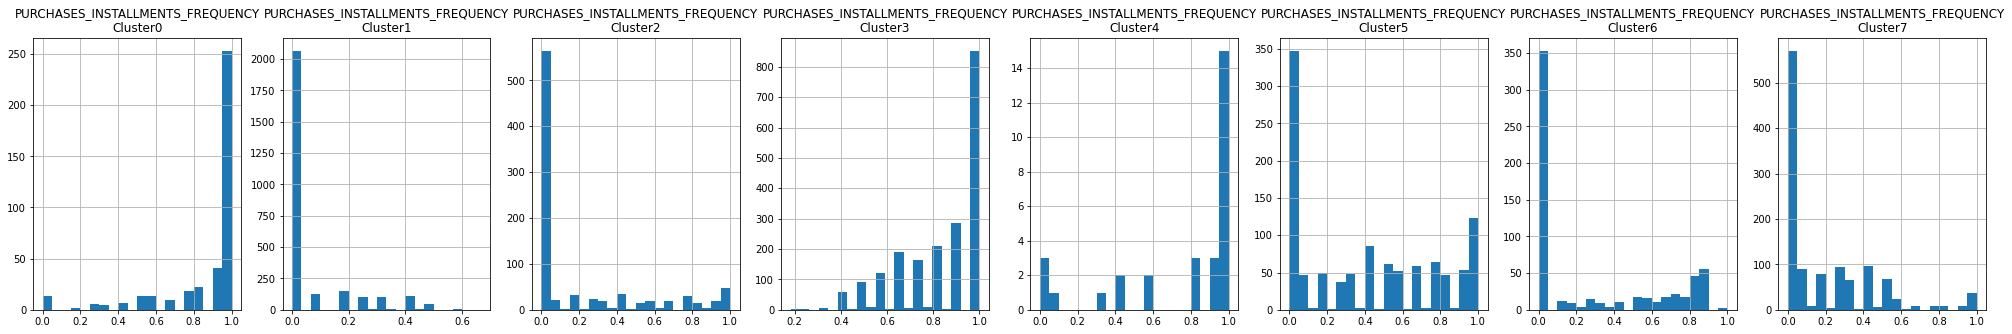

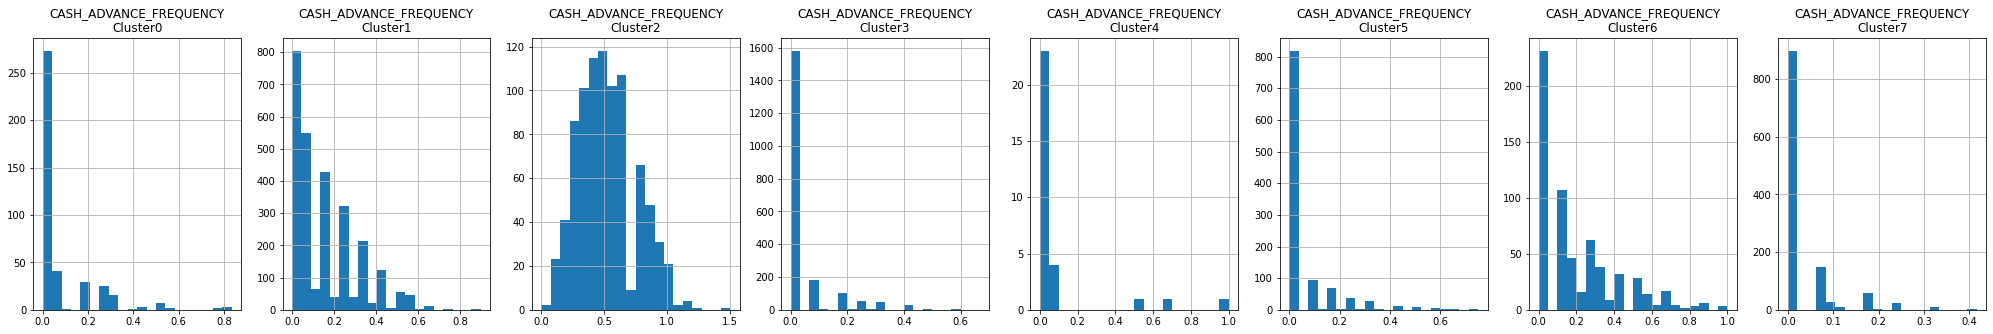

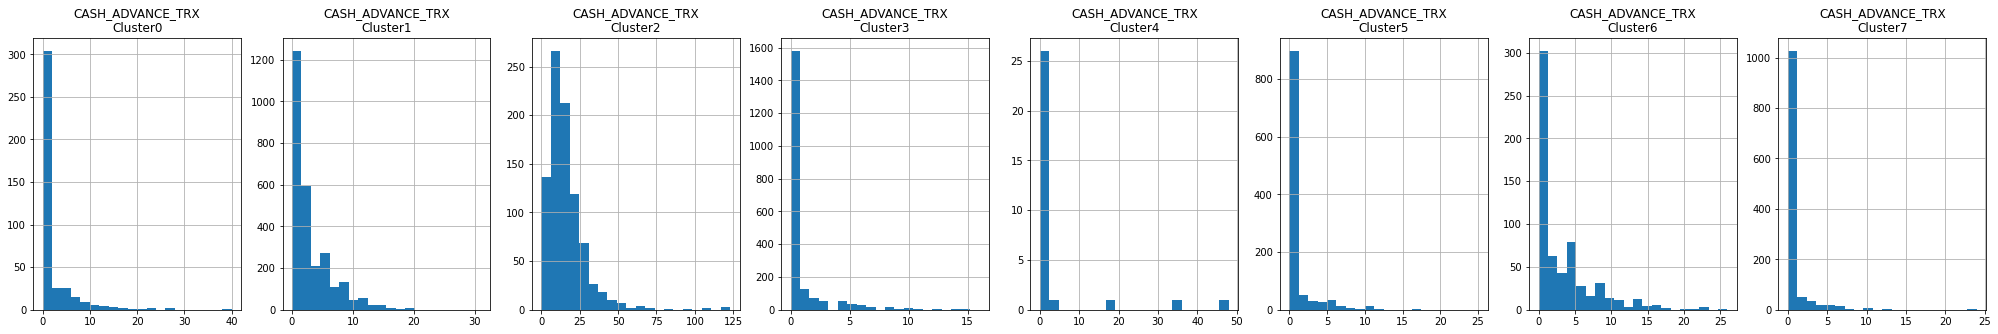

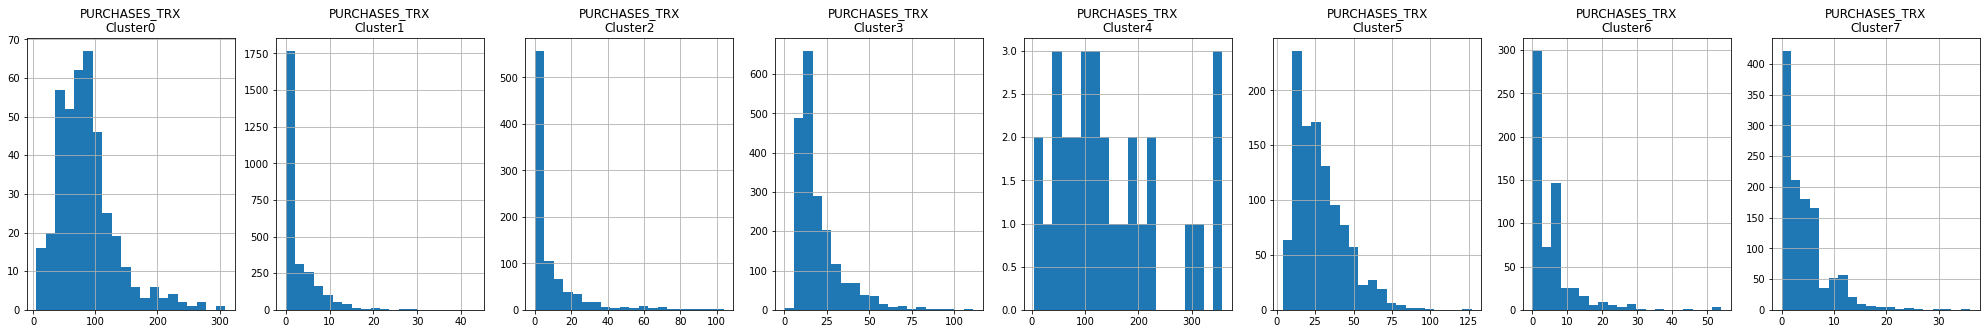

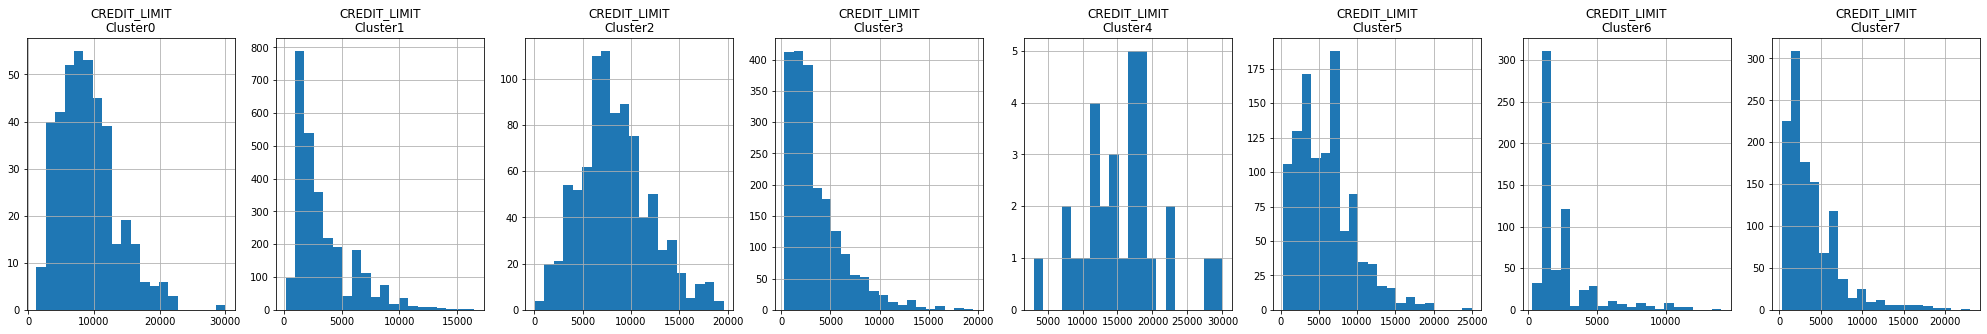

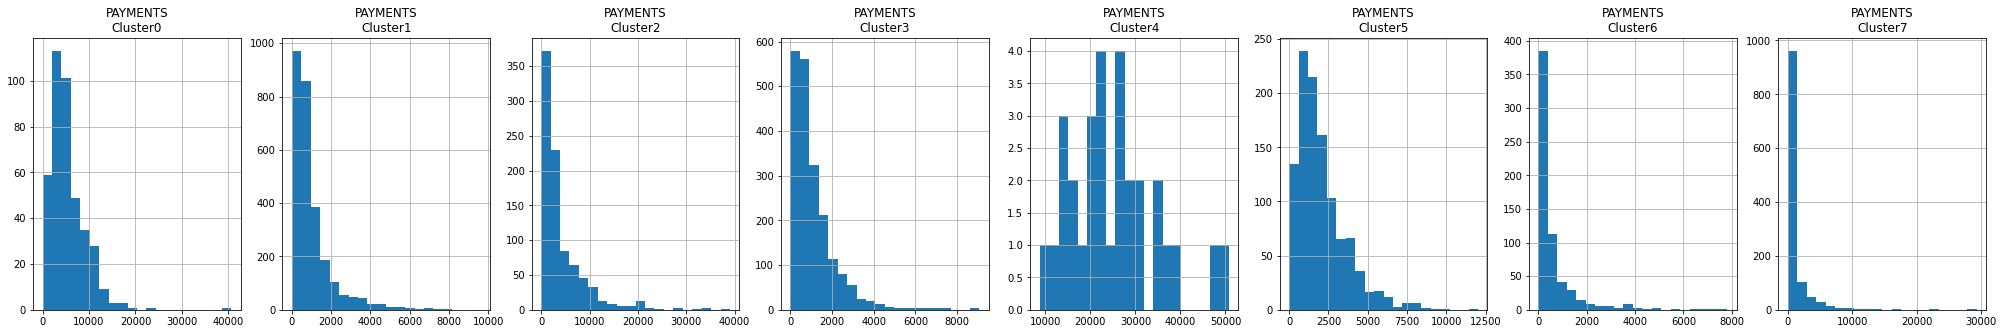

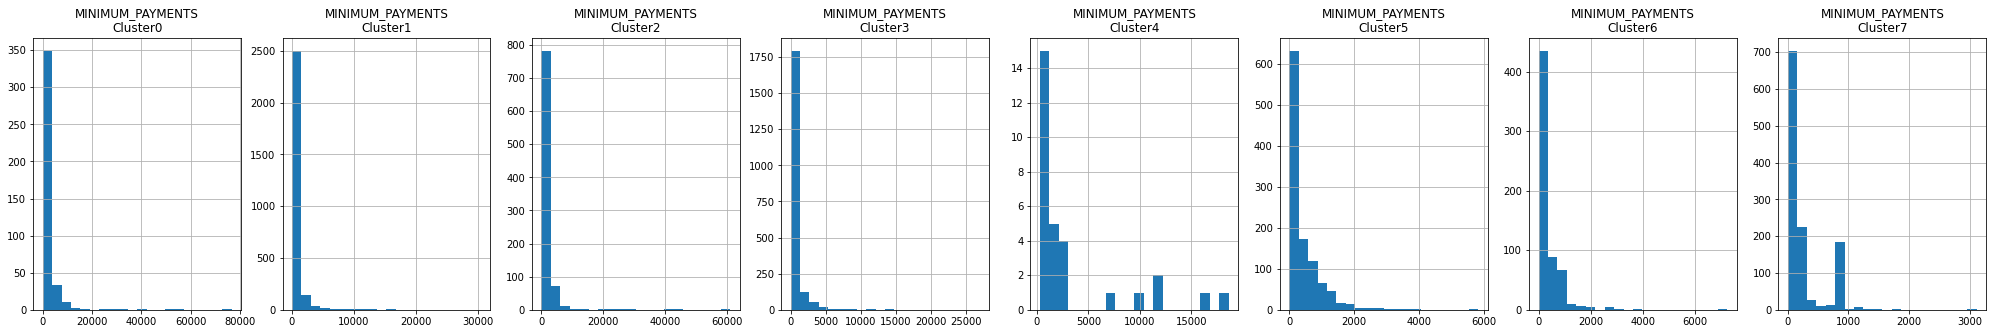

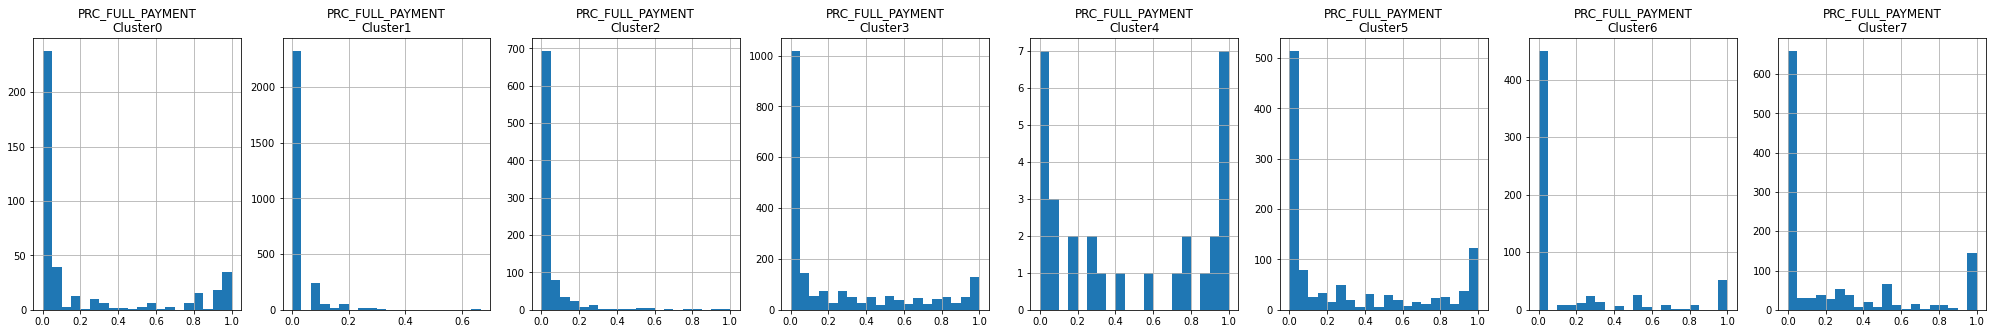

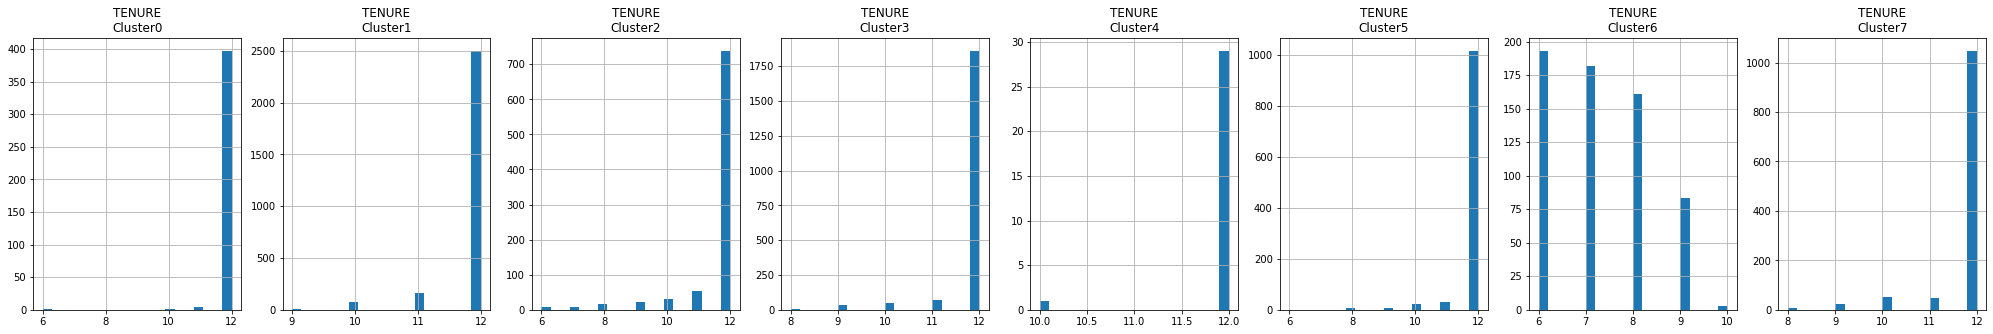

In [34]:
for i in credit_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster=credit_df_cluster[credit_df_cluster['cluster']==j]
    cluster[i].hist(bins=20)
    plt.title('{}\nCluster{}'.format(i,j))
plt.show()


PCA AND VISUALISATION

In [35]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(credit_df_scaled)
principal_comp


array([[-1.68221436, -1.07644706],
       [-1.13827735,  2.50644301],
       [ 0.96964454, -0.38346428],
       ...,
       [-0.92619966, -1.81077106],
       [-2.33654576, -0.65797065],
       [-0.55644414, -0.40047477]])

In [36]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682214,-1.076447
1,-1.138277,2.506443
2,0.969645,-0.383464
3,-0.873617,0.043163
4,-1.599431,-0.688573


In [37]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682214,-1.076447,1
1,-1.138277,2.506443,2
2,0.969645,-0.383464,5
3,-0.873617,0.043163,1
4,-1.599431,-0.688573,1


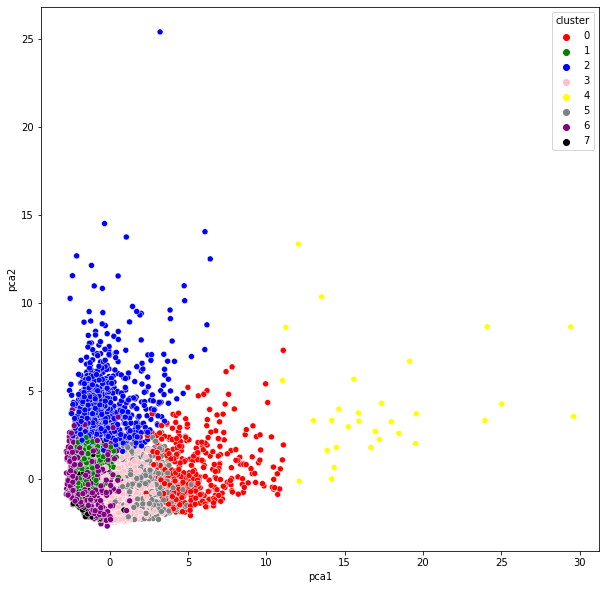

In [38]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

AUTOENCODERS

In [39]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD#stochastic graident descent

In [40]:
input_df=Input(shape=(17,))

x=Dense(7,activation='relu')(input_df)
x=Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
x=Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
x=Dense(2000,activation='relu',kernel_initializer='glorot_uniform')(x)

encoded=Dense(10,activation='relu',kernel_initializer='glorot_uniform')(x)
x=Dense(2000,activation='relu',kernel_initializer='glorot_uniform')(encoded)
x=Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)

decoded=Dense(17,kernel_initializer='glorot_uniform')(x)

autoencoder=Model(input_df,decoded)

encoder=Model(input_df,encoded)

autoencoder.compile(optimizer='adam',loss='mean_squared_error')



In [41]:
autoencoder.fit(credit_df_scaled,credit_df_scaled,batch_size=128,epochs=25,verbose=1)


Epoch 1/25
70/70 [==============================] - 5s 66ms/step - loss: 0.5887
Epoch 2/25
70/70 [==============================] - 4s 63ms/step - loss: 0.3227
Epoch 3/25
70/70 [==============================] - 4s 61ms/step - loss: 0.2337
Epoch 4/25
70/70 [==============================] - 5s 66ms/step - loss: 0.1811
Epoch 5/25
70/70 [==============================] - 5s 67ms/step - loss: 0.1509
Epoch 6/25
70/70 [==============================] - 5s 67ms/step - loss: 0.1359
Epoch 7/25
70/70 [==============================] - 4s 64ms/step - loss: 0.1245
Epoch 8/25
70/70 [==============================] - 4s 63ms/step - loss: 0.1158
Epoch 9/25
70/70 [==============================] - 5s 67ms/step - loss: 0.0984
Epoch 10/25
70/70 [==============================] - 4s 62ms/step - loss: 0.0959
Epoch 11/25
70/70 [==============================] - 4s 60ms/step - loss: 0.0953
Epoch 12/25
70/70 [==============================] - 4s 61ms/step - loss: 0.0866
Epoch 13/25
70/70 [==================

In [42]:
autoencoder.save_weights('autoencoder.h5')

In [43]:
pred = encoder.predict(credit_df_scaled)

In [44]:
pred

array([[0.02234656, 0.        , 0.15410079, ..., 0.        , 0.        ,
        0.        ],
       [1.8865973 , 0.        , 1.4549673 , ..., 0.        , 0.        ,
        0.        ],
       [0.7690277 , 0.        , 0.15693821, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02463137, 0.        , 2.3462715 , ..., 0.        , 0.        ,
        0.        ],
       [0.02905604, 0.        , 2.3569515 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.0831816 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [45]:
pred.shape

(8950, 10)

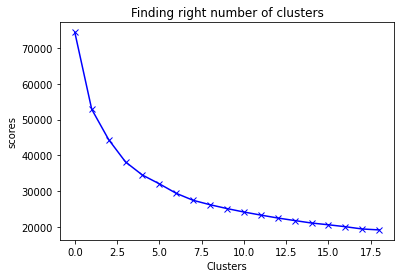

In [46]:
scores_2=[]
range_values=range(1,20)
for i in range_values:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)
plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

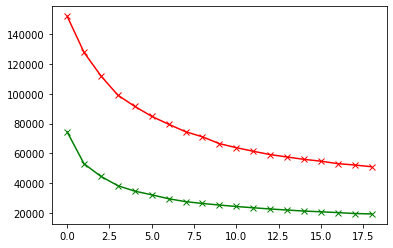

In [47]:
plt.plot(score_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [48]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(credit_df_scaled)

In [49]:
df_cluster_dr = pd.concat([credit_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [50]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.002958,-0.489597
1,-0.686086,1.004453
2,0.839759,-0.096975
3,-1.354786,0.179791
4,-1.956935,-0.315914


In [51]:

pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.002958,-0.489597,0
1,-0.686086,1.004453,0
2,0.839759,-0.096975,1
3,-1.354786,0.179791,0
4,-1.956935,-0.315914,0


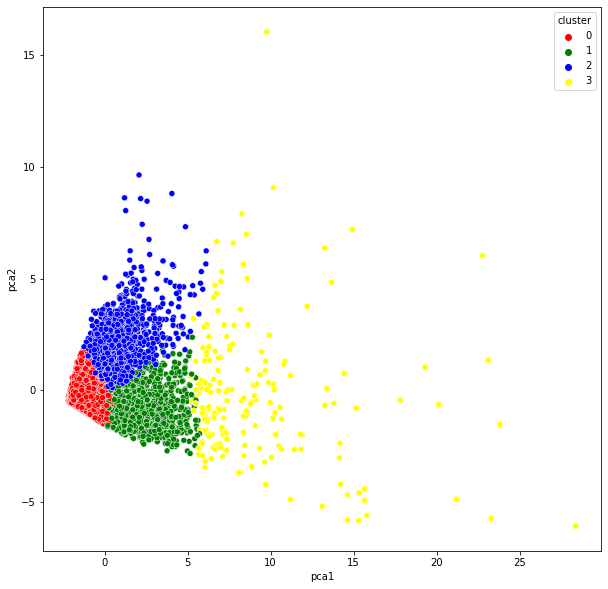

In [52]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()